# Mini-projet - Optimisation
### Valentin Alleaume & Elise Lei

## 1. Etude du problème d'optimisation

#### Question 1
> Choisir la variable $z$ à optimiser et préciser sa taille, notée $n$.

La variable $z$ à optimiser est le vecteur contenant les _ordonnées des points qui constitueront_ in fine les "poteaux" de la clotûre, ie. _la courbe que formera la clotûre_ (en effet, les abscisses des "poteaux" sont déjà données par la donnée des $(d_i)_{0\leq i \leq N-1}$).
$$z = (y_1, \dots, y_{N-1})$$

$z$ sera donc de taille $n = N-1$.

#### Question 2
> Formuler le coût $J(z)$ à minimiser.

Ici, on cherche à maximiser la surface disponible pour les moutons. Il suffit de __minimiser l'opposée de la surface disponible__ (que l'on calcule par la méthode des trapèzes).

$$J(z) = - \sum_{i=1}^{N} \dfrac{(y_{i-1} + y_i)(x_i-x_{i-1})}{2} = - \sum_{i=1}^{N} \dfrac{d_{i-1}(y_{i-1} + y_i)}{2}\\
\text{avec } \begin{cases}
    (x_0, y_0) = A = (a,0)\\
    (x_N, y_N) = B = (b,0)
\end{cases}$$
Soit
$$\boxed{J(z) = - \sum_{i=0}^{N-1} \dfrac{d_{i}(y_{i+1} + y_i)}{2}}\\
= -\dfrac{d_0 y_1}{2} - \dfrac{d_{N-1} y_{N-1}}{2} - \sum_{i=1}^{N-2} \dfrac{d_{i}(y_{i+1} + y_i)}{2}$$

#### Question 3
> Enumérer les contraintes égalités associées au problème, et formuler le problème d'optimisation sous la forme :
$$\min_{\underset{g(z)=0}{z\in\mathbb{R}^n}} J(z)$$

On a la contrainte de la longueur de la clotûre qui est fixée.
$$L = \sum_{i=0}^{N-1} \sqrt{d_i^2 + (y_{i+1} - y_i)^2}$$
On pose donc :
$$g(z) = L - \left[ \sqrt{y_1^2 + d_0^2} + \sqrt{y_{N-1}^2 + d_{N-1}^2} + \sum_{i=1}^{N-2} \sqrt{d_i^2 + (y_{i+1} - y_i)^2} \right]$$

Le problème d'optimisation s'exprime donc sous la forme :
$$\min_{\underset{g(z)=0}{z\in\mathbb{R}^n}} J(z)$$

#### Question 4
> A priori, le problème peut-il être non-convexe ?



## 2. Résolution numérique 

In [1]:
# Initialisation de l'environnement python
import numpy as np
import matplotlib.pyplot as plt
from casadi import *
%matplotlib inline

#### Question 5
> Ecrire un algorrithme qui renvoie la solution du problème d'optimisation $(1)$ et les positions $x_i$ associées.

In [2]:
def perim(x, y):
    assert len(x) == len(y)
    n = len(x)
    s = 0
    for i in range(n-1):
        s += ((x[i]-x[i+1])**2 + (y[i]-y[i+1])**2)**0.5
    return s

In [3]:
def cost1(N, y, d):
    J = 0
    for i in range(N):
        J -= d[i]*(y[i+1]+y[i])/2
    return J

def constraint1(N, y, d, L):
    g = L 
    for i in range(N):
        g -= ((y[i+1]-y[i])**2+d[i]**2)**0.5
    return g

def init1(n, d, L):
    h = (L - np.sum(d[1:-1]))/2
    y = h * np.ones(n)
    y[0], y[-1] = 0., 0.
    return y

def optimal_curve(a, b, L, N=40, d=None, init_guess=None):
    n = N+1
    if d==None:
        d = (b-a)/N * np.ones(N)       # vecteur des distances entre abscisses
    if init_guess==None:
        init_guess = init1(n,d,L)     # initialisation en un vecteur nul
    opti = casadi.Opti()               # initialisation Casadi
    y = opti.variable(n)
    J = cost1(N,y,d)
    opti.minimize(J)
    opti.subject_to(constraint1(N,y,d,L)==0)
    opti.subject_to(y[0]==0)
    opti.subject_to(y[-1]==0)
    opti.set_initial(y, init_guess)
    opti.solver('ipopt')
    sol = opti.solve()
    def abscisses(a, b, d):
        x = np.zeros(len(d)+1)
        x[0] = a
        x[-1] = b
        for i in range(1,len(d)):
            x[i] = x[i-1] + d[i-1]
        return x
    x_opt, y_opt = abscisses(a,b,d), sol.value(y)
    return x_opt, y_opt

In [21]:
a = 0
b = 100
L = 166

1e+003 9.84e+001  -1.0 1.30e+005    -  1.00e+000 1.56e-002f  7
 548 -2.6598918e+005 7.33e+003 9.17e+001  -1.0 4.79e+007    -  1.00e+000 6.10e-005f 15
 549 -3.7743981e+005 7.98e+003 9.84e+001  -1.0 5.08e+008    -  1.00e+000 3.81e-006f 19
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 550 -4.2355620e+005 9.62e+003 9.17e+001  -1.0 4.69e+006    -  1.00e+000 2.44e-004f 13
 551 -4.6888974e+005 9.62e+003 9.17e+001  -1.0 1.03e+008    -  1.00e+000 7.63e-006f 18
 552 -4.7135476e+005 9.74e+003 9.13e+001  -1.0 4.49e+004    -  1.00e+000 3.91e-003f  9
 553 -4.8183071e+005 9.84e+003 9.12e+001  -1.0 1.35e+005    -  1.00e+000 9.77e-004f 11
 554 -4.7971183e+005 9.81e+003 9.04e+001  -1.0 5.58e+003    -  1.00e+000 7.81e-003h  8
 555 -2.5697664e+005 6.49e+003 9.44e+001  -1.0 4.62e+003    -  1.00e+000 1.00e+000h  1
 556 -3.0461416e+005 7.17e+003 9.43e+001  -1.0 1.43e+006    -  1.00e+000 9.77e-004f 11
 557 -3.3944943e+005 7.69e+003 9.43e+001  -1.0 1.22e+008    -  1.00e+000 

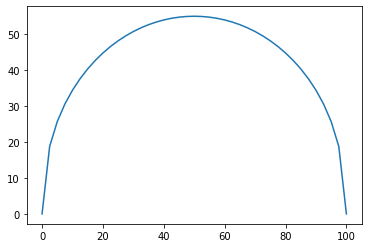

In [22]:
x, y = optimal_curve(a,b,L)
plt.plot(x,y)

In [10]:
perim(x, y)

500.0000000002883

In [7]:
cost1(40, y, (b-a)/40 * np.ones(40))

-10904.516290581845

## 3.Ajout d'une contrainte

In [43]:
import pandas as pd
from scipy.interpolate import interp1d
df = pd.read_csv ('groupe_5_river_positions.csv')
x_ref , y_ref = np. array (df['x']), np. array (df['y'])
y_max_river = interp1d (x_ref , y_ref)


In [44]:
def optimal_curve_river(a, b, L, y_max_river, N=40, d=None, init_guess=None):
    n = N+1
    if d==None:
        d = (b-a)/N * np.ones(N)       # vecteur des distances entre abscisses
    if init_guess==None:
        init_guess = init1(n,d,L)     # initialisation en un vecteur nul
    opti = casadi.Opti()               # initialisation Casadi
    y = opti.variable(n)
    J = cost1(N,y,d)
    opti.minimize(J)
    opti.subject_to(constraint1(N,y,d,L)==0)
    opti.subject_to(y[0]==0)
    opti.subject_to(y[-1]==0)
    for i in range(N): 
        opti.subject_to(y_max_river(i*(b-a)/N) >= y[i])
    opti.set_initial(y, init_guess)
    opti.solver('ipopt')
    sol = opti.solve()
    def abscisses(a, b, d):
        x = np.zeros(len(d)+1)
        x[0] = a
        x[-1] = b
        for i in range(1,len(d)):
            x[i] = x[i-1] + d[i-1]
        return x
    x_opt, y_opt = abscisses(a,b,d), sol.value(y)
    return x_opt, y_opt

In [48]:
a, b =0, 200
L = 250

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:       43
Number of nonzeros in inequality constraint Jacobian.:       40
Number of nonzeros in Lagrangian Hessian.............:       81

Total number of variables............................:       41
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        3
Total number of inequality constraints...............:       40
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       40

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -

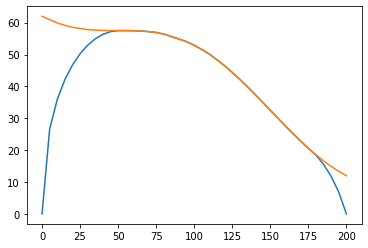

In [49]:
x, y = optimal_curve_river(a,b,L, y_max_river)
plt.plot(x,y)
plt.plot(x, y_max_river(x))